Dataset used: https://www.kaggle.com/datasets/supriyoain/genshin-impact-google-play-reviews

In [ ]:
!pip install langchain_community
!pip install replicate
!pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.74
    Uninstalling langchain-core-0.3.74:
      Successfully uninstalled langchain-core-0.3.74
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.7 MB

In [ ]:
from google.colab import userdata
import os

# Setting up environment variables
token = userdata.get('REPLICATE_API_TOKEN')
kaggle_user = userdata.get('KAGGLE_USERNAME')
kaggle_key = userdata.get('KAGGLE_KEY')
os.environ['REPLICATE_API_TOKEN'] = token
os.environ['KAGGLE_USERNAME'] = kaggle_user
os.environ['KAGGLE_KEY'] = kaggle_key

In [ ]:
from langchain_community.llms import Replicate

# Fetching the LLM model from Replicate
llm = Replicate(model="ibm-granite/granite-3.3-8b-instruct")

In [ ]:
import kagglehub

# Downloading the dataset from Kaggle
datafile = kagglehub.dataset_download("supriyoain/genshin-impact-google-play-reviews") + "/genshin_review.csv"

import pandas as pd

# Reading the dataset
df = pd.read_csv(datafile)
print(df)

100%|██████████| 44.6k/44.6k [00:00<00:00, 4.27MB/s]

Extracting files...


                                                review  rating
0    Absolute Masterpiece i hate the people who gav...       5
1                 amazing but the fandom isn't amazing       5
2                                            Very nice       5
3                  Give me gambling money (primo gems)       4
4    This is one my first Open World RPG games, and...       4
..                                                 ...     ...
990                                               Yeah       4
991                                      Getting bored       3
992                                    This game sucks       1
993  "If Adventuring in Teyvat was a dream, Genshin...       5
994  I love this game it's so slay 🥰😍💅✨🤩🤑🤭🔥🤯😇😃😘😜☺️❤️💖👍       5

[995 rows x 2 columns]


In [ ]:
sentiments = {
    "positive": 0,
    "negative": 0,
    "neutral" :0
}

In [ ]:
parameters = {
  "top_k": 1,
  "top_p": 0.5,
  "max_tokens": 3,
  "min_tokens": 1,
  "random_seed": None,
  "repetition_penalty": 1.5,
  "stopping_criteria": "length",
  "stopping_sequence": " "
}

for review, rating in zip(df['review'], df['rating']):
  prompt = f"Classify this review in just one word (positive, negative, or neutral) based on user sentiment and tone of review: {review}. From 1 to 5 scale, the user's rating is {rating}"
  response = llm.invoke(prompt, parameters=parameters)
  print(f"Review: {review}\nRating: {rating}\nResponse: {response}\n")
  if "positive" in response.lower() and "negative" in response.lower():
    sentiments["neutral"] += 1
  elif "positive" in response.lower():
    sentiments["positive"] += 1
  elif "negative" in response.lower():
    sentiments["negative"] += 1
  else:
    sentiments["neutral"] += 1

print(sentiments)

Review: Absolute Masterpiece i hate the people who gave this beautiful game 1 star just because you don't have the storage to play it that doesn't mean that is there problem.
Rating: 5
Response: Positive

Review: amazing but the fandom isn't amazing
Rating: 5
Response: Positive

Review: Very nice
Rating: 5
Response: Positive

Review: Give me gambling money (primo gems)
Rating: 4
Response: Positive

Review: This is one my first Open World RPG games, and I think I never have loved a game as much as this... The graphics, character designs, the waifus are all amazing, even the story is kinda good... But the updates are dry and the content is not enough when one is at endgame, so hv recently been burnt out. I would love it if they devs can think of a way to entice old players to stay. Also give better rewards man.
Rating: 4
Response: Positive

[Explanation] The review expresses strong admiration for the game, praising its graphics, character designs, story, and even referring to "waifus" (a

In [ ]:
sentiments = {
    "positive": 616,
    "negative": 346,
    "neutral" :33
}

Classified result:
{'positive': 616,
'negative': 346,
'neutral': 33}

In [ ]:
llm.invoke(f"Generate code for Python bar chart visualization of this data using Matplotlib: {sentiments}")

'To create a bar chart visualization of the given data using Matplotlib, you can use the following Python code:\n\n```python\nimport matplotlib.pyplot as plt\n\n# Data\nlabels = [\'positive\', \'negative\', \'neutral\']\nvalues = [616, 346, 33]\n\n# Create bar chart\nplt.bar(labels, values)\n\n# Add title and labels\nplt.title(\'Sentiment Analysis\')\nplt.xlabel(\'Sentiment\')\nplt.ylabel(\'Count\')\n\n# Show the plot\nplt.show()\n```\n\nThis code will generate a bar chart with sentiment labels on the x-axis and corresponding counts on the y-axis. The title of the chart will be "Sentiment Analysis".'

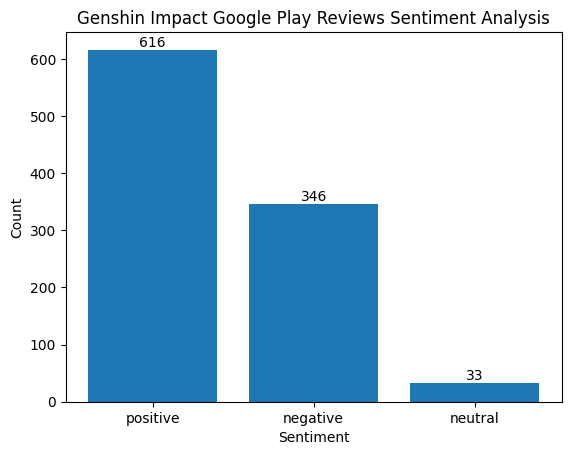

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ["positive", "negative", "neutral"]
values = [616, 346, 33]

# Create bar chart
plt.bar(labels, values)

# Add title and labels
plt.title("Genshin Impact Google Play Reviews Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Show count on top of graph
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.show()

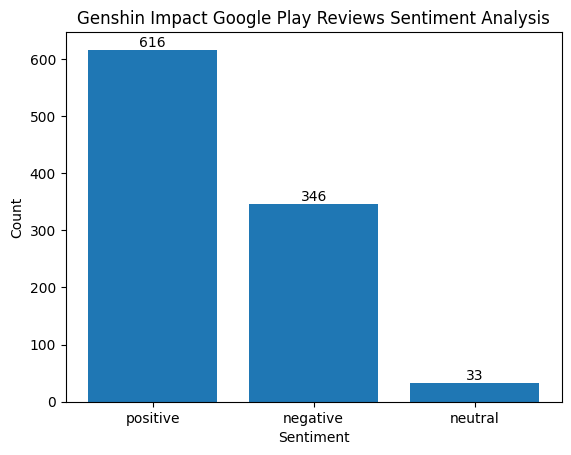

In [ ]:
all_reviews = "\n".join(df['review'])
prompt = f"""Summarize these reviews in bullet lists, highlighting what are already good and what are in need of improvement.
Use this format:
Positives:
- List all things that are already good
Negatives:
- List all things that are in need of improvement

 {all_reviews}"""
parameters = {
  "top_k": 10,
  "top_p": 0.9,
  "max_tokens": 512,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.5,
  "stopping_criteria": None,
  "stopping_sequence": None
}
response = llm.invoke(prompt, parameters=parameters)
print("Summary: " + response)

Summary: **Positives:**

- Stunning graphics and visuals
- Engaging storyline and lore
- Beautiful character designs
- Open-world exploration and diverse environments
- Strategic combat system
- Regular updates with new content
- High-quality music and sound effects
- Variety of characters with unique abilities
- A captivating and immersive gaming experience
- Fun and addictive gameplay
- High replay value due to different character builds and strategies
- Cross-platform playability
- Active and engaged community

**Negatives:**

- Gacha system perceived as pay-to-win and unfair
- Repetitive quests and grinding
- High storage requirements (30+ GB)
- Lag and performance issues on lower-end devices
- Unskippable dialogues and cutscenes
- Limited controller support for Android devices
- Insufficient rewards and slow progression for free-to-play players
- Lack of endgame content for high-level players
- High demand on mobile data and battery life
- Inconsistent customer service and account

**Positives:**

- Stunning graphics and visuals
- Engaging storyline and lore
- Beautiful character designs
- Open-world exploration and diverse environments
- Strategic combat system
- Regular updates with new content
- High-quality music and sound effects
- Variety of characters with unique abilities
- A captivating and immersive gaming experience
- Fun and addictive gameplay
- High replay value due to different character builds and strategies
- Cross-platform playability
- Active and engaged community

**Negatives:**

- Gacha system perceived as pay-to-win and unfair
- Repetitive quests and grinding
- High storage requirements (30+ GB)
- Lag and performance issues on lower-end devices
- Unskippable dialogues and cutscenes
- Limited controller support for Android devices
- Insufficient rewards and slow progression for free-to-play players
- Lack of endgame content for high-level players
- High demand on mobile data and battery life
- Inconsistent customer service and account recovery issues
- Repetitive events and lack of unique rewards
- Long loading times and frequent crashes
- Limited language options
- Lack of competitive multiplayer modes
- Difficulty balancing and enemy strength discrepancies
- Unsatisfying rewards for time invested
- Perceived lack of player choice in the story
- Unpredictable and low 5-star character acquisition rates
- Excessive focus on monetization over gameplay improvements

In [ ]:
all_reviews = "\n".join(df['review'])
prompt = f"""Summarize these reviews in paragraphs, encompassing all reviews below.

 {all_reviews}"""
parameters = {
  "top_k": 10,
  "top_p": 0.9,
  "max_tokens": 512,
  "min_tokens": 0,
  "random_seed": None,
}
response = llm.invoke(prompt, parameters=parameters)
print("Summary: " + response)

Summary: **Summary of Genshin Impact Reviews:**

Genshin Impact has received a mixed bag of reviews, with many users praising its stunning graphics, engaging storylines, and beautiful character designs. Players appreciate the vast open world, the intricate combat system, and the continuous updates with new content. The game's lore and attention to detail are often highlighted as standout features. Many users express their admiration for specific characters, such as Venti, Zhongli, and Mona, and enjoy the adventure and exploration elements.

However, the game has also been criticized for several aspects. A significant concern among players is the game's gacha system, which is perceived as predatory and unfair, especially for free-to-play (F2P) players. Many users express frustration over the difficulty in obtaining 5-star characters and the low rates of success in 50/50 events. The grind required to progress, especially for endgame content, is seen as excessive and tedious by some.

The

Genshin Impact has received a mixed bag of reviews, with many users praising its stunning graphics, engaging storylines, and beautiful character designs. Players appreciate the vast open world, the intricate combat system, and the continuous updates with new content. The game's lore and attention to detail are often highlighted as standout features. Many users express their admiration for specific characters, such as Venti, Zhongli, and Mona, and enjoy the adventure and exploration elements.

However, the game has also been criticized for several aspects. A significant concern among players is the game's gacha system, which is perceived as predatory and unfair, especially for free-to-play (F2P) players. Many users express frustration over the difficulty in obtaining 5-star characters and the low rates of success in 50/50 events. The grind required to progress, especially for endgame content, is seen as excessive and tedious by some.

The game's storage requirements are another frequent complaint, particularly on mobile devices. Many users report issues with insufficient storage, even after deleting numerous apps and files. There are also recurring technical problems, including crashes, bugs, and connectivity issues. Customer service responses have been criticized for being inadequate or non-existent, which adds to player frustration.

Some players have expressed dissatisfaction with the game's lack of controller support on Android devices and the absence of a skip dialogue option for lengthy cutscenes. Others suggest improvements such as more QoL updates, better rewards, and more diverse content. The game's reliance on microtransactions for progression has led to accusations of it being a "pay-to-win" game, discouraging some players.

In summary, while Genshin Impact is lauded for its high-quality visuals, engaging story, and expansive world, it faces criticism for its gacha mechanics, grind-heavy gameplay, high storage requirements, technical issues, and perceived lack of responsiveness to player feedback.

In [ ]:
all_reviews = "\n".join(df['review'])
prompt = f"""Analyze what to be done by Genshin Impact's developer to further increase the game's ratings and reviews

 {all_reviews}"""
parameters = {
  "top_k": 10,
  "top_p": 0.9,
  "max_tokens": 1024,
  "min_tokens": 0,
  "random_seed": None,
  "stopping_criteria": None,
  "stopping_sequence": None
}
response = llm.invoke(prompt, parameters=parameters)
print("Summary: " + response)

Summary: Based on the user reviews, here are some key areas where Genshin Impact's developers, miHoYo, could focus to potentially increase ratings and reviews:

1. **Storage Optimization**: Many users complain about the large storage space Genshin Impact requires. miHoYo could work on optimizing the game's size without compromising quality, making it more accessible to players with limited storage.

2. **Rewards and Gacha System**: Players express dissatisfaction with the gacha system, feeling that it's difficult to obtain 5-star characters, especially as free-to-play (F2P) players. Improving the rewards system and ensuring a fairer chance for F2P players to obtain desired characters would enhance player satisfaction.

3. **Endgame Content**: Some players report a lack of content to engage with after reaching higher Adventure Ranks (AR). Adding more endgame activities, such as challenging PvP modes, high-level PvE content, or additional deep dives into the lore, could help retain playe

Based on the user reviews, here are some key areas where Genshin Impact's developers, miHoYo, could focus to potentially increase ratings and reviews:

1. **Storage Optimization**: Many users complain about the large storage space Genshin Impact requires. miHoYo could work on optimizing the game's size without compromising quality, making it more accessible to players with limited storage.

2. **Rewards and Gacha System**: Players express dissatisfaction with the gacha system, feeling that it's difficult to obtain 5-star characters, especially as free-to-play (F2P) players. Improving the rewards system and ensuring a fairer chance for F2P players to obtain desired characters would enhance player satisfaction.

3. **Endgame Content**: Some players report a lack of content to engage with after reaching higher Adventure Ranks (AR). Adding more endgame activities, such as challenging PvP modes, high-level PvE content, or additional deep dives into the lore, could help retain players.

4. **Grind and Progression**: The grind to level up characters and acquire resources is criticized as tedious and time-consuming. Streamlining the progression system and making it less repetitive would improve the overall gaming experience.

5. **Customer Support**: Several users have had negative experiences with customer support, reporting unresponsive or ineffective assistance in resolving account-related issues. Improving customer service quality and responsiveness would boost player trust and satisfaction.

6. **Skip Dialogue/Cutscenes**: Many players request a skip option for lengthy cutscenes and dialogues, especially for those replaying quests or progressing through the story for the second time.

7. **Controller Support for Android**: Some players prefer using a controller for better gameplay experience on Android devices. Adding controller support would cater to this player segment.

8. **Bug Fixes and Performance**: Addressing persistent bugs, crashes, and lag issues, particularly on lower-end devices, would enhance the overall gameplay experience and encourage players to continue enjoying Genshin Impact.

9. **Community and Social Features**: Expanding co-op features, adding more meaningful interactions between players, or introducing a clan system could foster a stronger sense of community and encourage players to remain engaged.